# Design patterns in Python

Reuven Lerner • https://lerner.co.il/ 

E-mail: reuven@lerner.co.il • Twitter: [@reuvenmlerner](https://Twitter.com/reuvenmlerner)

This notebook is at https://github.com/reuven/oscon-2020, updated every 1-2 min!

1. Creational -- ways to create new objects
2. Structural -- ways to arrange a number of objects for better, cleaner communication
3. Behavioral -- divide up algorithms for easier maintenance and understanding

# Iterator pattern

In [1]:
for one_letter in 'abcd':
    print(one_letter)

a
b
c
d


In [2]:
for one_element in [10, 20, 30]:
    print(one_element)

10
20
30


In [6]:
# create a new class that's iterable

class MyIterIterator:
    def __init__(self, data):
        self.data = data
        self.index = 0

    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
            
        value = self.data[self.index]
        self.index += 1
        return value
    

class MyIter:
    def __init__(self, data):
        self.data = data
        
    def __iter__(self):
        return MyIterIterator(self.data)
    
        
m = MyIter('abcd')

for one_item in m:
    print(one_item)
    
for one_item in m:
    print(one_item)

a
b
c
d
a
b
c
d


In [7]:
iter(m)

In [8]:
iter(m)

In [11]:
# create a new class that's iterable

class VowelsOnlyIterator:
    def __init__(self, data):
        self.data = data
        self.index = 0

    def __next__(self):
        while True:            
            if self.index >= len(self.data):
                raise StopIteration

            value = self.data[self.index]
            self.index += 1
            if value in 'aeiou':
                return value
    

class VowelsOnly:
    def __init__(self, data):
        self.data = data
        
    def __iter__(self):
        return VowelsOnlyIterator(self.data)
    
        
m = VowelsOnly('abcde')

for one_item in m:
    print(one_item)
    
for one_item in m:
    print(one_item)

a
e
a
e


# Observer

In [15]:
class Logger:
    def print_log(self, message):
        print(f'[Logger]: {message}')


class NetworkLogger:
    def print_log(self, message):
        print(f'[NetworkLogger]: {message}')
        
class Person:
    def __init__(self, name):
        self.name = name
        self.observers = []
        
    def get_name(self):
        return self.name
    
    def set_name(self, new_name):
        self.name = new_name
        for one_observer in self.observers:
            one_observer.print_log(f'Updated name to {new_name}')
        
    def register(self, new_observer):
        self.observers.append(new_observer)
        
p = Person('Reuven')
print(p.get_name())

logger = Logger()
nl = NetworkLogger()
p.register(logger)
p.register(nl)


p.set_name('Someone else')
print(p.get_name())

Reuven
[Logger]: Updated name to Someone else
[NetworkLogger]: Updated name to Someone else
Someone else


# Adapter



In [16]:
import time
import random

class StockMarket:
    def get_price(self, symbol):
        return {'symbol':symbol,
               'price':random.randint(0,100),
               'time':time.time()}
    
class StockClient:
    def __init__(self, service):
        self.service = service
        self.history = []
        
    def get_price(self, symbol):
        price = self.service.get_price(symbol)
        self.history.append(price)
        return price
    
sm = StockMarket()
c = StockClient(sm)

for i in range(5):
    print(c.get_price('PYTHON'))
        

{'symbol': 'PYTHON', 'price': 86, 'time': 1592516293.736522}
{'symbol': 'PYTHON', 'price': 23, 'time': 1592516293.73679}
{'symbol': 'PYTHON', 'price': 78, 'time': 1592516293.73682}
{'symbol': 'PYTHON', 'price': 7, 'time': 1592516293.73684}
{'symbol': 'PYTHON', 'price': 45, 'time': 1592516293.7368581}


In [20]:
from collections import namedtuple

Quote = namedtuple('Quote', ['symbol', 'price', 'time', 'delta'])

class NewMarket:
    def get_latest_price(self, symbol):
        return Quote(symbol, 
                    random.randint(0, 100),
                    time.time(),
                    random.randint(0, 10))
    
    
nm = NewMarket()
nm.get_latest_price('RUBY')
        

Quote(symbol='RUBY', price=23, time=1592516447.627787, delta=4)

In [21]:
class StockAdapter:
    def __init__(self, service):
        self.service = service
        
    def get_price(self, symbol):
        nt = self.service.get_latest_price(symbol)
        
        return {'symbol': nt.symbol,
                'price': nt.price,
                'time': nt.time}
    
c = StockClient(StockAdapter(NewMarket()))

In [22]:
for i in range(5):
    print(c.get_price('RUBY'))

{'symbol': 'RUBY', 'price': 60, 'time': 1592516565.062718}
{'symbol': 'RUBY', 'price': 55, 'time': 1592516565.062887}
{'symbol': 'RUBY', 'price': 85, 'time': 1592516565.062912}
{'symbol': 'RUBY', 'price': 100, 'time': 1592516565.062933}
{'symbol': 'RUBY', 'price': 99, 'time': 1592516565.062953}


# Singleton



In [23]:
class Singleton:
    _instance = None  # class attribute
    
    def __new__(cls, *args, **kwargs):
        if Singleton._instance is None:
            Singleton._instance = object.__new__(cls)
        return Singleton._instance
        

s1 = Singleton()
s2 = Singleton()

s1 is s2

True

In [24]:
s1.x = 10
s2.x

10

In [25]:
s2.x = 20
s1.x

20

In [26]:
type(None)

NoneType

In [31]:
type(None)() is None

True

In [33]:
def a():
    return "I'm in a!"

def b():
    return "I'm in b!"

funcs = {'a':a, 
        'b':b}

while True:
    choice = input("Enter a choice: ")
    
    if not choice:
        break
        
    if choice in funcs:
        print(funcs[choice]())
        
    else:
        print(f'No such function {choice}')

Enter a choice: a
I'm in a!
Enter a choice: b
I'm in b!
Enter a choice: a
I'm in a!
Enter a choice: b
I'm in b!
Enter a choice: c
No such function c
Enter a choice: 


In [34]:
from pandas import Series

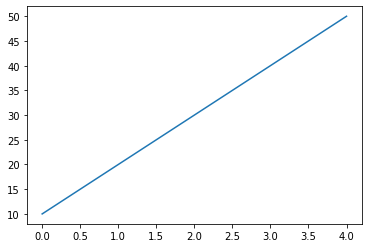

In [35]:
s = Series([10, 20, 30, 40, 50])
s.plot.line()